<div style="display: flex; align-items: center;">
    <div style="max-width: 300px;">
        <img src="marca_UPV_principal_negro150.png" />
    </div>
    <div style="max-width: 400px; padding: 20px">
        <img src="ETSInf_PRINCIPAL_V-horizontal.png"/>
    </div>
    <div>
        Daniele Borghesi</br>
        Francesco Pio Capoccello
    </div>
</div>

# Educational Data Analysis
## ASSIGNMENT 2: Dimensionality Reduction
----
## PART 1
### Exploratory Factor Analysis (EFA)
----

## Preliminary operations

In [10]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
sns.set(style="white")

In [11]:
# import reflex C dataset
df_reflex_C = pd.read_excel("reflex_c.xlsx")
# get job values features
df_job_values = df_reflex_C.loc[:, "Work_Autonomy":]
# correct aknowledgment column name
df_job_values.rename(columns={'Acknowledgment_Acknowledgment': 'Acknowledgment'}, inplace=True)
# convert job values to np array for clustering
np_job_values = np.array(df_job_values)

df_job_values

,Work_Autonomy,Job_Stability,Opportunity_Things,High_Income,Meeting_Challenges,Good_Prospects,Have_Yourself,Acknowledgment,Opportunity_Yourself,Work_Balance
0,4,5,5,5,4,5,5,2,4,5
1,4,4,4,3,4,4,5,4,4,5
2,4,5,4,4,4,5,4,3,4,5
3,4,4,4,4,5,4,4,3,3,4
4,2,4,4,3,4,3,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...
2112,4,3,5,4,5,5,3,4,3,3
2113,3,4,5,5,5,5,5,4,3,5
2114,5,5,5,4,4,5,5,2,4,5
2115,5,5,5,5,5,5,3,2,4,3


## KMO calculation

In [12]:
# calculate KMO
kmo_all, kmo_model = calculate_kmo(df_job_values)

print("Global Kmo: {:.2f}".format(kmo_model))
print("KMO for the single features:")
print(kmo_all)

Global Kmo: 0.76
KMO for the single features:
[0.86329226 0.78141359 0.7944618  0.77843401 0.75409318 0.8221455
 0.69029545 0.76416342 0.76274456 0.68947677]


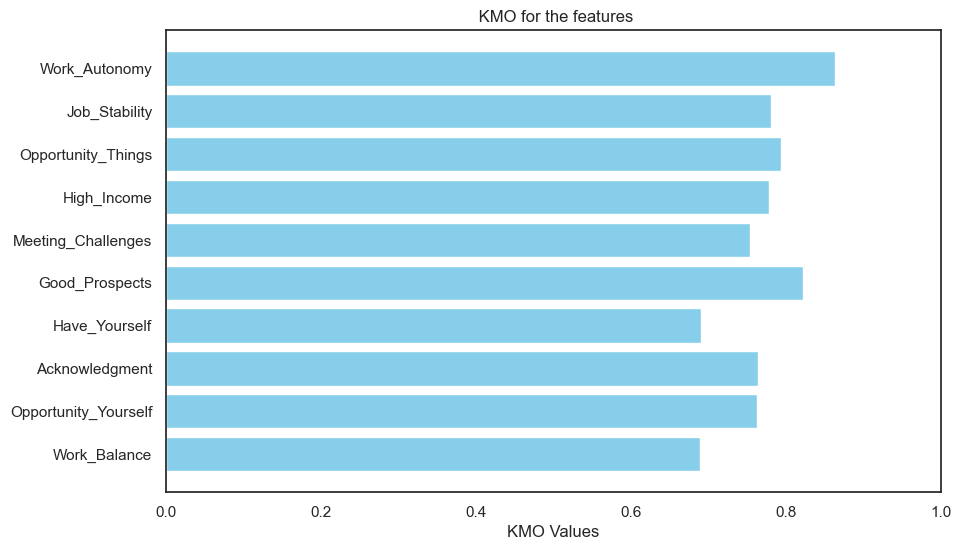

In [13]:
kmo_values = kmo_all
feature_names = df_job_values.columns

# plot KMO values
plt.figure(figsize=(10, 6))
plt.barh(feature_names, kmo_values, color='skyblue')
plt.xlabel('KMO Values')
plt.title(' KMO for the features')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

## Eigenvalues calculation

In [14]:
# define n° of factors
n_factors = 3
# define factor analyzeer
efa = FactorAnalyzer(n_factors, rotation=None)
# fit factor analyzer
efa.fit(df_job_values)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [15]:
# get EFA eigenvalues
eigenvalues = np.array(efa.get_eigenvalues())
print(eigenvalues[0])

[3.09619414 1.34369111 1.03217981 0.97318486 0.82197992 0.7714679
 0.54750912 0.50849627 0.46546759 0.43982928]


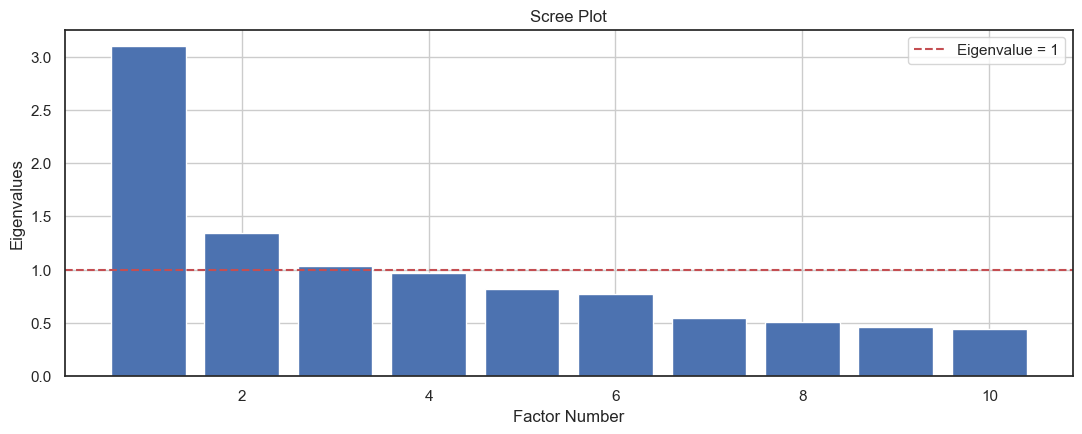

In [16]:
# Create a bar plot for eigenvalues
plt.figure(figsize=(13, 4.5))
plt.bar(range(1, len(eigenvalues[0]) + 1), eigenvalues[0])
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.grid(True)

# Add a horizontal line at y=1
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
plt.legend()

plt.savefig("eigenvalues.pdf", format="pdf")
plt.show()

## Factors analysis

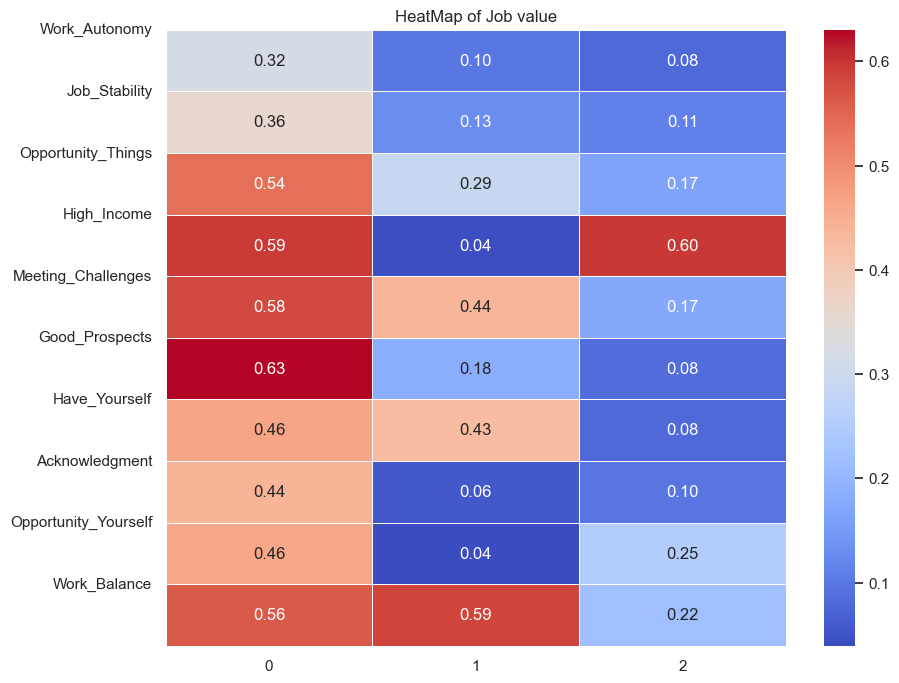

In [17]:
# print matrix of factors
plt.figure(figsize=(10, 8))
plt.title("HeatMap of Job value")
sns.heatmap(abs(efa.loadings_), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.yticks(ticks=range(len(df_job_values.columns)), labels=df_job_values.columns, rotation='horizontal')
plt.savefig("eigenvalues.pdf", format="pdf")
plt.show()